<a href="https://colab.research.google.com/github/DinWaikabu/Machine_Learning/blob/master/Prediksi_Saham_PT_Wika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("/content/drive/My Drive/DATA/wika.csv", delimiter=';')

In [8]:
print(df.head())

      Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah    Vol. Perubahan%
0  26/11/2018     1.390      1.375      1.410     1.375  14,59M      1,09%
1  23/11/2018     1.375      1.380      1.390     1.345  20,10M      0,36%
2  22/11/2018     1.370      1.295      1.385     1.290  71,89M      6,20%
3  21/11/2018     1.290      1.250      1.300     1.230  28,41M      1,18%
4  19/11/2018     1.275      1.225      1.290     1.225  34,64M      4,08%


In [10]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.sort_values(by='Tanggal', ascending=True, inplace=True)
print(df.head())

       Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah    Vol. Perubahan%
497 2016-01-11     2.352      2.408      2.408     2.334   7,63M     -1,18%
475 2016-01-12     2.410      2.440      2.440     2.380  13,07M     -0,82%
496 2016-02-11     2.297      2.352      2.352     2.278  14,58M     -2,34%
474 2016-02-12     2.450      2.410      2.470     2.390  14,11M      1,66%
495 2016-03-11     2.260      2.297      2.334     2.250  15,97M     -1,61%


In [11]:
print(df.tail())

       Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah    Vol. Perubahan%
147 2018-12-04     1.700      1.735      1.740     1.700  15,22M     -1,45%
93  2018-12-07     1.355      1.345      1.395     1.345  11,08M      1,12%
52  2018-12-09     1.425      1.455      1.465     1.425   5,81M     -0,70%
30  2018-12-10     1.290      1.285      1.300     1.270   5,32M      1,57%
9   2018-12-11     1.170      1.205      1.225     1.165  16,46M     -2,90%


In [0]:
df.set_index('Tanggal', inplace=True)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats 
from statsmodels.graphics.api import qqplot 


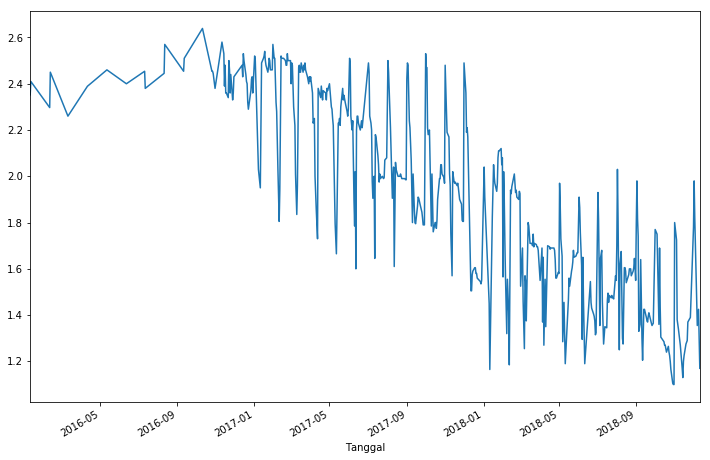

In [18]:
df['Terakhir'].plot(figsize=(12,8))

melihat apakah data stasioner ?

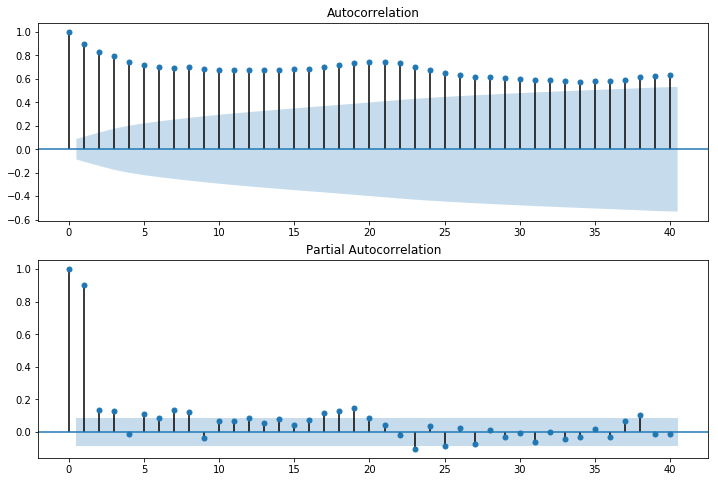

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.Terakhir.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df[['Terakhir']], lags=40, ax=ax2)